In [1]:
import json
import numpy as np
from pycocotools.coco import COCO
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the COCO annotations

In [2]:
coco = COCO(rf'C:\Users\andre\PycharmProjects\Pynattas_DcDc\data\SPECTRE_prova\annotations_SPECTRE.json')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [3]:
# Initialize an empty list to store widths and heights
wh = []

# Loop over all annotations
for ann_id in coco.anns:
    ann = coco.anns[ann_id]
    bbox = ann['bbox']
    
    # Convert bbox from cx, cy, w, h to w, h (assuming bbox is [cx, cy, w, h])
    width = bbox[2]
    height = bbox[3]
    
    wh.append([width, height])

# Convert the list to a numpy array
wh = np.array(wh)

# K-means

In [15]:
# Apply k-means to the widths and heights
kmeans = KMeans(n_clusters=6, random_state=0).fit(wh)

# Get the cluster centers, which represent the anchor box sizes
anchor_boxes = kmeans.cluster_centers_

# Optionally, sort anchor boxes by width to make them more interpretable
anchor_boxes = anchor_boxes[np.argsort(anchor_boxes[:, 0])]

# Print the anchor box sizes
print("Anchor Boxes (width, height):")
for i, box in enumerate(anchor_boxes):
    print(f"Anchor Box {i+1}: {box[0]:.2f} x {box[1]:.2f}")

Anchor Boxes (width, height):
Anchor Box 1: 18.81 x 14.03
Anchor Box 2: 21.71 x 28.96
Anchor Box 3: 27.00 x 44.23
Anchor Box 4: 29.73 x 16.60
Anchor Box 5: 45.17 x 21.15
Anchor Box 6: 72.67 x 24.50


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


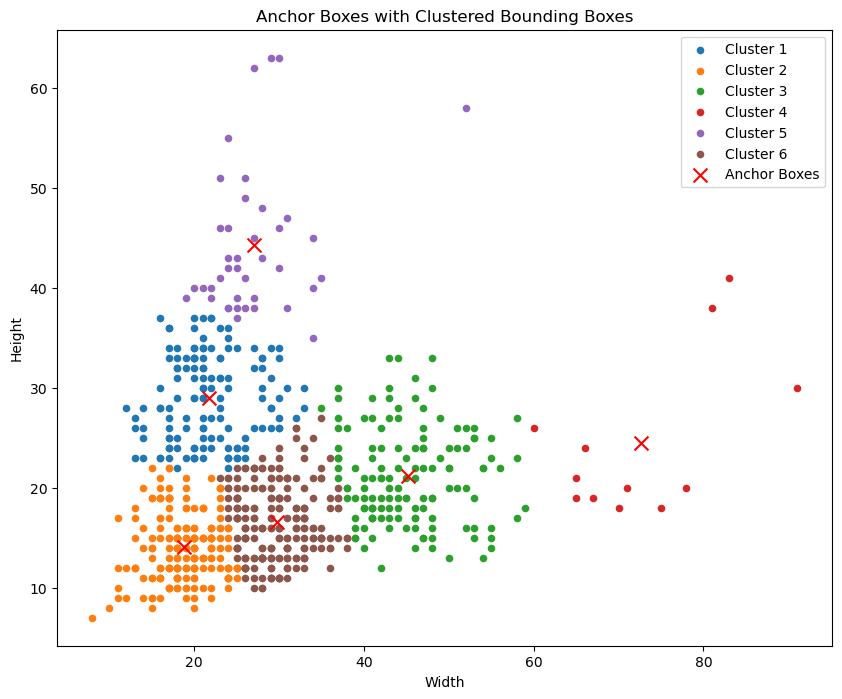

In [16]:
# Get the labels assigned to each point by the k-means algorithm
labels = kmeans.labels_

# Plot each cluster in a different color
plt.figure(figsize=(10, 8))
for i in range(kmeans.n_clusters):
    # Select the points that belong to the current cluster
    cluster_points = wh[labels == i]
    
    # Plot these points
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=20, label=f'Cluster {i+1}')

# Plot the anchor boxes (cluster centers) as red 'x' markers
plt.scatter(anchor_boxes[:, 0], anchor_boxes[:, 1], c='red', marker='x', s=100, label='Anchor Boxes')

# Add labels and title
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Anchor Boxes with Clustered Bounding Boxes')
plt.legend()
plt.show()

# WHR

In [18]:
# Initialize an empty list to store widths and heights
whr = []

# Loop over all annotations
for ann_id in coco.anns:
    ann = coco.anns[ann_id]
    bbox = ann['bbox']
    
    # Convert bbox from cx, cy, w, h to w, h (assuming bbox is [cx, cy, w, h])
    width = bbox[2]
    height = bbox[3]
    wh_ratio = width/height
    
    whr.append([width, height, wh_ratio])

# Convert the list to a numpy array
whr = np.array(whr)

In [19]:
# Apply k-means to the widths, heights, and ratios
kmeans = KMeans(n_clusters=6, random_state=0).fit(whr)

# Get the cluster centers, which represent the anchor box sizes
anchor_boxes = kmeans.cluster_centers_

# Optionally, sort anchor boxes by width to make them more interpretable
anchor_boxes = anchor_boxes[np.argsort(anchor_boxes[:, 0])]

# Print the anchor box sizes
print("Anchor Boxes (width, height, w/h ratio):")
for i, box in enumerate(anchor_boxes):
    print(f"Anchor Box {i+1}: {box[0]:.2f} x {box[1]:.2f} with aspect ratio {box[2]:.2f}")

Anchor Boxes (width, height, w/h ratio):
Anchor Box 1: 18.81 x 14.03 with aspect ratio 1.41
Anchor Box 2: 21.75 x 28.86 with aspect ratio 0.77
Anchor Box 3: 27.00 x 44.23 with aspect ratio 0.62
Anchor Box 4: 29.78 x 16.55 with aspect ratio 1.89
Anchor Box 5: 45.17 x 21.15 with aspect ratio 2.25
Anchor Box 6: 72.67 x 24.50 with aspect ratio 3.15


c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\andre\anaconda3\envs\deeplearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


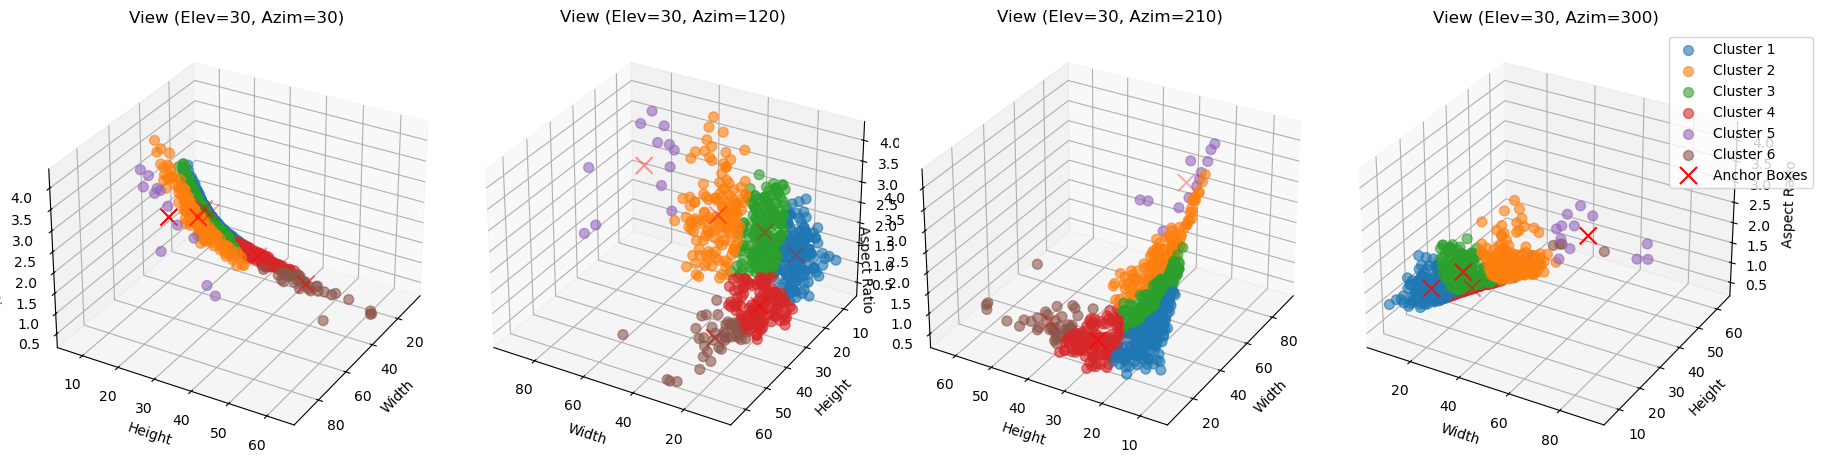

In [21]:
# Create subplots to show multiple viewpoints
fig = plt.figure(figsize=(18, 6))

# Define viewing angles (elevation, azimuth)
view_angles = [(30, 30), (30, 120), (30, 210), (30, 300)]

# Define a colormap
cmap = plt.get_cmap("tab10")

# Loop over different viewpoints
for i, (elev, azim) in enumerate(view_angles):
    ax = fig.add_subplot(1, len(view_angles), i + 1, projection='3d')

    # Plot each bounding box, coloring by cluster
    for cluster_idx in range(kmeans.n_clusters):
        # Select the points that belong to the current cluster
        cluster_points = whr[kmeans.labels_ == cluster_idx]
        
        # Plot these points with the same color for the cluster
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], 
                   s=50, color=cmap(cluster_idx), label=f'Cluster {cluster_idx + 1}', alpha=0.6, marker='o')

    # Plot the anchor boxes (cluster centers) as larger red 'x' markers
    ax.scatter(anchor_boxes[:, 0], anchor_boxes[:, 1], anchor_boxes[:, 2], 
               c='red', marker='x', s=150, label='Anchor Boxes')

    # Set viewpoint
    ax.view_init(elev=elev, azim=azim)

    # Add labels and title for each subplot
    ax.set_xlabel('Width')
    ax.set_ylabel('Height')
    ax.set_zlabel('Aspect Ratio')
    ax.set_title(f'View (Elev={elev}, Azim={azim})')

# Handle the legend outside of the subplots
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()